In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('dropout.csv')

In [4]:
data.head()

,Location,Social Category,primary_Girls,primary_Boys,primary_Overall,upper_Girls,upper_Boys,upper_Overall,second_Girls,second_Boys,second_Overall
0,AHMEDABAD,General,0.00,0.00,0.00,0.00,0.00,0.00,8.00,8.51,8.28
1,AHMEDABAD,OBC,0.00,0.00,0.00,7.17,4.03,5.49,17.23,20.13,18.96
2,AHMEDABAD,SC,0.00,0.00,0.00,0.00,0.00,0.00,9.89,14.03,12.21
3,AHMEDABAD,ST,0.00,0.00,0.00,17.65,15.37,16.39,29.30,25.31,27.06
4,AMRELI,General,1.07,1.67,1.41,0.00,2.97,0.00,0.00,9.02,1.21


In [5]:
data.isnull().sum()

Location           0
Social Category    0
primary_Girls      0
primary_Boys       0
primary_Overall    0
upper_Girls        0
upper_Boys         0
upper_Overall      0
second_Girls       0
second_Boys        0
second_Overall     0
dtype: int64

In [6]:
data.fillna(value = 0,
          inplace = True)

In [7]:
data.isnull().sum()

Location           0
Social Category    0
primary_Girls      0
primary_Boys       0
primary_Overall    0
upper_Girls        0
upper_Boys         0
upper_Overall      0
second_Girls       0
second_Boys        0
second_Overall     0
dtype: int64

In [8]:
data.describe()

,primary_Girls,primary_Boys,primary_Overall,upper_Girls,upper_Boys,upper_Overall,second_Girls,second_Boys,second_Overall
count,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000
mean,2.811418,2.784935,2.739405,7.727489,5.751277,6.536407,20.724805,25.263041,23.273842
std,5.478286,5.352513,5.326901,8.686351,8.144939,8.197779,10.680441,10.410403,9.990065
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.675000,0.255000,1.057500,13.740000,18.910000,16.782500
50%,1.010000,1.020000,0.930000,6.575000,3.815000,5.110000,20.905000,26.010000,23.825000
75%,3.197500,3.260000,3.192500,11.342500,8.040000,9.505000,27.212500,31.477500,29.155000
max,69.630000,62.110000,65.880000,148.530000,151.350000,150.000000,72.680000,78.080000,74.040000


In [9]:
data.columns

Index(['Location', 'Social Category', 'primary_Girls', 'primary_Boys',
       'primary_Overall', 'upper_Girls', 'upper_Boys', 'upper_Overall',
       'second_Girls', 'second_Boys', 'second_Overall'],
      dtype='object')

In [10]:
data.sort_values('Location' , inplace =True)

In [11]:
data.sort_values(['Social Category' , 'Location']).head(3)

,Location,Social Category,primary_Girls,primary_Boys,primary_Overall,upper_Girls,upper_Boys,upper_Overall,second_Girls,second_Boys,second_Overall
0,AHMEDABAD,General,0.00,0.00,0.00,0.00,0.00,0.0,8.00,8.51,8.28
660,AHMEDABAD,General,0.00,0.00,0.00,0.28,0.00,0.0,5.27,12.37,9.44
264,AHMEDABAD,General,9.23,12.54,11.02,12.00,12.73,12.4,12.77,21.93,18.05


In [12]:
primary_data = data.groupby(['Social Category' , 'primary_Overall']).size().unstack('Social Category' , fill_value = 0)

In [13]:
primary_data.head()

Social Category,General,OBC,SC,ST
primary_Overall,,,,
0.00,102,67,90,63
0.02,1,0,1,1
0.03,1,1,0,0
0.04,1,0,0,0
0.06,0,1,0,0


In [14]:
upper_data = data.groupby(['Social Category','upper_Overall']).size().unstack('Social Category' , fill_value = 0)

In [15]:
upper_data.head(2)

Social Category,General,OBC,SC,ST
upper_Overall,,,,
0.00,77,8,54,50
0.02,0,0,0,1


In [16]:
second_data=data.groupby(['Social Category' , 'second_Overall']).size().unstack('Social Category' , fill_value = 0)

In [17]:
second_data.head(2)

Social Category,General,OBC,SC,ST
second_Overall,,,,
0.00,6,0,5,9
0.22,0,0,0,1


In [18]:
data.columns

Index(['Location', 'Social Category', 'primary_Girls', 'primary_Boys',
       'primary_Overall', 'upper_Girls', 'upper_Boys', 'upper_Overall',
       'second_Girls', 'second_Boys', 'second_Overall'],
      dtype='object')

In [19]:
upper_data.columns

Index(['General', 'OBC', 'SC', 'ST'], dtype='object', name='Social Category')

In [35]:
pda = pd.read_csv('Primary_data.csv')
ud = pd.read_csv('upper_data.csv')
sd = pd.read_csv('second_data.csv')
pda.head()

,primary_Overall,General,OBC,SC,ST
0,0.00,102,67,90,63
1,0.02,1,0,1,1
2,0.03,1,1,0,0
3,0.04,1,0,0,0
4,0.06,0,1,0,0


In [21]:
import seaborn as sns

In [22]:
def comparison_Graph(input_data):
    fig , axs  = plt.subplots(1,3 , figsize= (12,6))
    sns.barplot(data=pda , x = "primary_Overall", y=input_data , ax = axs[0])
    sns.barplot(data=ud , x = "upper_Overall"   , y=input_data , ax = axs[1])
    sns.barplot(data=sd , x = "second_Overall"  , y=input_data , ax = axs[2])
    axs[0].set_title('primary data' )
    axs[1].set_title('upper data')
    axs[2].set_title('Secodary data')
    plt.show()

Enter The Catagory Amoung the following Data for Show the graph : ['General', 'OBC', 'SC', 'ST']  OBC


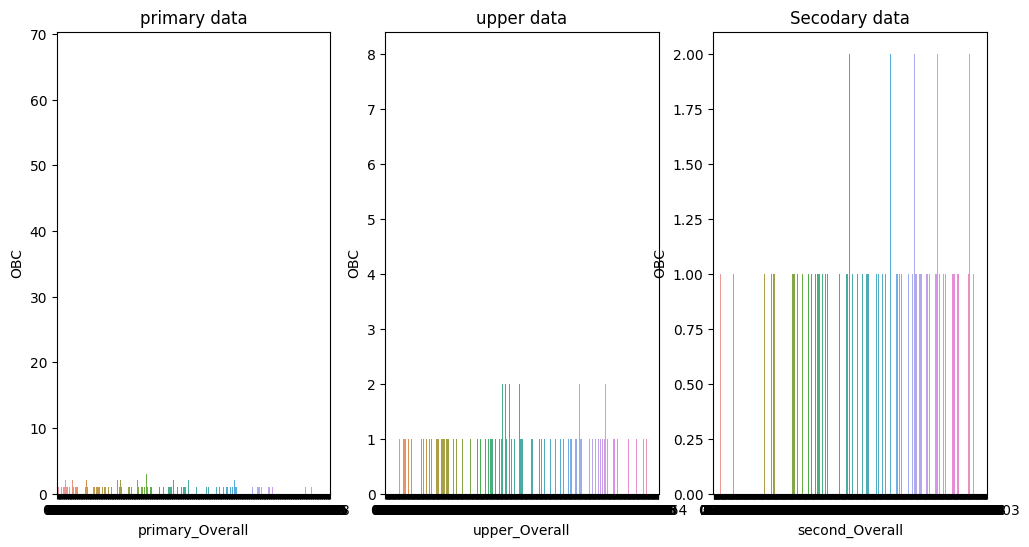

In [25]:
# piece of code for the graph plot 
Input = str(input("Enter The Catagory Amoung the following Data for Show the graph : ['General', 'OBC', 'SC', 'ST'] "))
print()
if Input == 'General' or Input == 'OBC' or Input== 'SC' or Input == 'ST':
    comparison_Graph(Input)
else:
    print("please Enter the valide number  ")

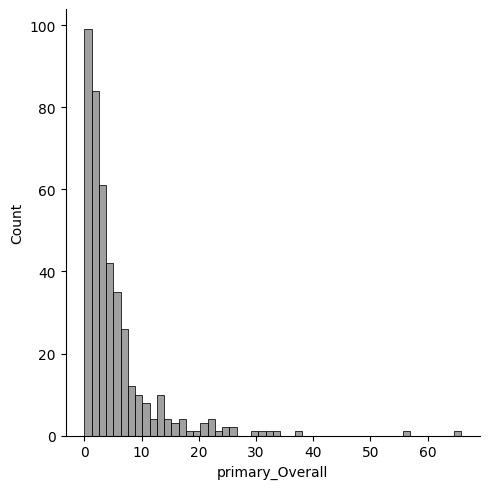

In [63]:
sns.displot(pda['primary_Overall'] , color='gray' )

In [64]:
data.head()

,Location,Social Category,primary_Girls,primary_Boys,primary_Overall,upper_Girls,upper_Boys,upper_Overall,second_Girls,second_Boys,second_Overall
0,AHMEDABAD,General,0.00,0.00,0.00,0.00,0.00,0.00,8.00,8.51,8.28
661,AHMEDABAD,OBC,6.85,6.71,6.77,16.93,11.16,13.75,33.79,35.73,35.01
660,AHMEDABAD,General,0.00,0.00,0.00,0.28,0.00,0.00,5.27,12.37,9.44
264,AHMEDABAD,General,9.23,12.54,11.02,12.00,12.73,12.40,12.77,21.93,18.05
265,AHMEDABAD,OBC,0.00,0.00,0.00,0.43,0.00,0.00,16.72,24.65,21.60
